In [3]:
import pandas as pd
import graphlab as gl
import numpy as np
import os,glob
from __future__ import unicode_literals
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.spatial.distance import cosine
# color = 'black'
# mpl.rcParams['axes.labelcolor'] = color
# mpl.rcParams['axes.labelsize'] = 'x-large'
# mpl.rcParams['figure.figsize'] = (10,8)
# mpl.rcParams['xtick.color'] = color
# mpl.rcParams['ytick.color'] = color
# mpl.rcParams['ytick.labelsize'] = 'x-large'
# mpl.rcParams['xtick.labelsize'] = 'x-large'
# mpl.rcParams['axes.titlesize'] = 'xx-large'
# mpl.rcParams['text.color'] = color
# mpl.rcParams['text.usetex'] = False
# mpl.rcParams['legend.fontsize'] = 'x-large'
import seaborn
colors = seaborn.color_palette()

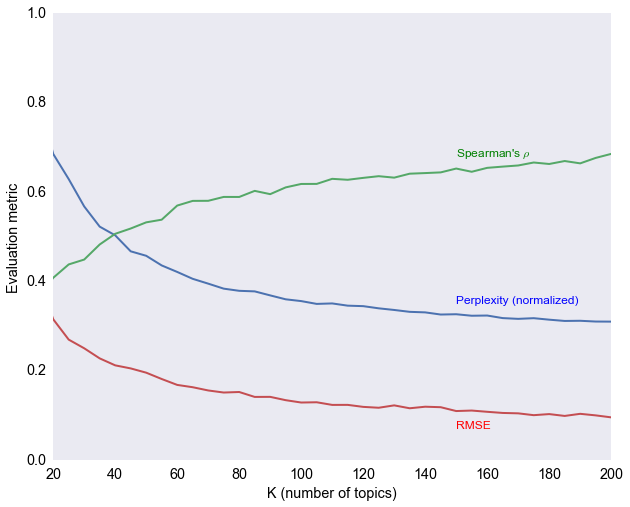

In [38]:
lda_stats = pd.read_table('../GenreModeling/eval_results/basic_lda_final.txt',sep=r"\s*",index_col='K',engine='python')
lda_stats['perplexity'] = lda_stats['perplexity']/lda_stats['perplexity'].max()
cols = [col for col in lda_stats.columns if ('euclidean' not in col) and ('jsd' not in col) and ('split' not in col)]
ax = lda_stats[cols].plot(legend=None,xlim=(20,200),lw=2)
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of topics)")

handles,labels = ax.get_legend_handles_labels()
# l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
#                        "RMSE (prev)",r"Spearman's $\rho$ (split)", "RMSE (split)"])
# for text in l.get_texts():
#     text.set_color("black")
ax.annotate('Perplexity (normalized)',(150,.35),color='blue',fontsize='large')
ax.annotate(r"Spearman's $\rho$",(150,.68),color='green',fontsize='large')
#ax.annotate(r"Spearman's $\rho$ (split)",(150,.57),color=(0,191/255.,191/255.),fontsize='large')
ax.annotate("RMSE",(150,.07),color='red',fontsize='large')
#ax.annotate("RMSE (split)",(162,.13),color=(192/255.,0,192/255.),fontsize='large')
ax.grid()

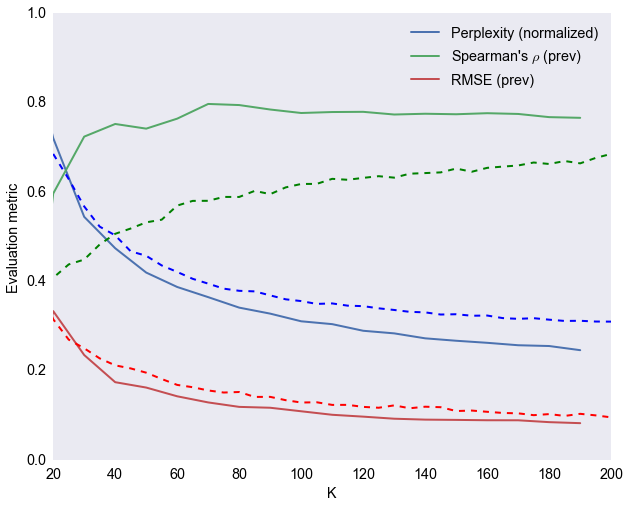

In [39]:
lda_stats_2 = pd.read_table('../GenreModeling/eval_results/artist_lda_final.txt',sep=r"\s*",index_col='K',engine='python')
lda_stats_2['perplexity'] = lda_stats_2['perplexity']/lda_stats_2['perplexity'].max()
cols = [col for col in lda_stats_2.columns if ('euclidean' not in col) and ('jsd' not in col) and ('split' not in col)]
ax = lda_stats_2[cols].plot(legend=None,xlim=(20,200),lw=2)
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of topics)")

lda_stats[cols].plot(legend=None,xlim=(20,200),lw=2,ax=ax,ls='--',color=['blue','green','red'])

handles,labels = ax.get_legend_handles_labels()
l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
                       "RMSE (prev)"])#,r"Spearman's $\rho$ (split)", "RMSE (split)"])
for text in l.get_texts():
    text.set_color("black")
ax.grid()

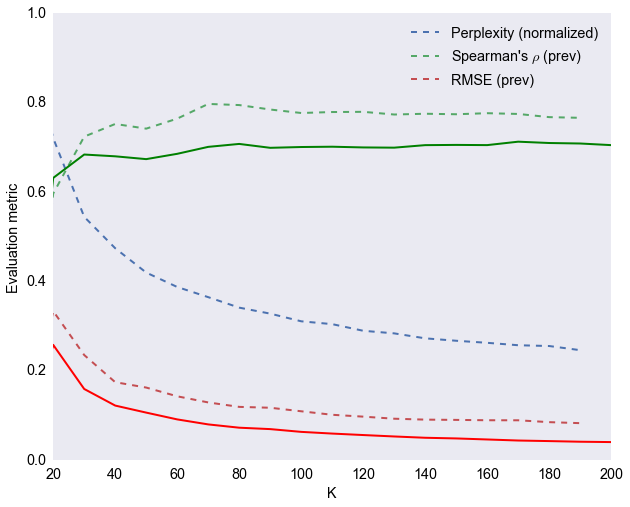

In [40]:
mf_stats = pd.read_table('../GenreModeling/eval_results/basic_mf_final.txt',sep=r"\s*",index_col='K',engine='python')
ax = lda_stats_2[cols].plot(legend=None,xlim=(20,200),lw=2,ls='--')
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of factrs)")

mf_stats.plot(legend=None,xlim=(20,200),lw=2,ax=ax,ls='-',color=['green','red'])

handles,labels = ax.get_legend_handles_labels()
l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
                       "RMSE (prev)"])#,r"Spearman's $\rho$ (split)", "RMSE (split)"])
for text in l.get_texts():
    text.set_color("black")
ax.grid()

In [41]:
lda_summary = pd.read_table('../GenreModeling/eval_results/knn_lda.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
mf_summary = pd.read_table('../GenreModeling/eval_results/knn_mf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
nmf_summary = pd.read_table('../GenreModeling/eval_results/knn_nmf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
lda_summary_artists = pd.read_table('../GenreModeling/eval_results/knn_lda_artists.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])

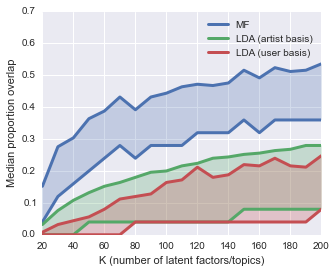

In [683]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

mf_plot = nmf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
mf_plot[25].plot(ax=ax,ylim=(0,1),lw=3,c=colors[0],label='MF')#,color=['blue','green','red','cyan','magenta','yellow'])
mf_plot[250].plot(ax=ax,lw=3,c=colors[0])
ax.fill_between(np.arange(20,201,10),mf_plot[25],mf_plot[250],color=colors[0],alpha=0.25)

# nmf_plot = nmf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
# nmf_plot[25].plot(ax=ax,ylim=(0,1),lw=3,c='cyan',label='MF')#,color=['blue','green','red','cyan','magenta','yellow'])
# nmf_plot[250].plot(ax=ax,lw=3,c='cyan')
#ax.fill_between(np.arange(20,201,10),nmf_plot[25],nmf_plot[250],color='cyan',alpha=0.25)

lda_a_plot = lda_summary_artists.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
lda_a_plot[25].plot(ax=ax,lw=3,c=colors[1],label='LDA (artist basis)')
lda_a_plot[250].plot(ax=ax,lw=3,c=colors[1])
ax.fill_between(np.arange(20,201,10),lda_a_plot[25],lda_a_plot[250],color=colors[1],alpha=0.25)

lda_plot = lda_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
lda_plot[25].plot(ax=ax,lw=3,c=colors[2],label='LDA (user basis)')
lda_plot[250].plot(ax=ax,lw=3,c=colors[2])
ax.fill_between(np.arange(20,201,10),lda_plot[25],lda_plot[250],color=colors[2],alpha=0.25)

#nmf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1),lw=1,legend=False,ls='--',ax=ax,color=['blue','green','red','cyan','magenta','yellow'])
# l = ax.get_legend()
# for text in l.get_texts():
#     text.set_color("black")
# t = l.get_title()
# t.set_text("KNN")
t.set_color("black")
t.set_fontsize("x-large")
# ax.annotate("MF model",(45,0.88),color='k',fontsize='x-large')
# ax.annotate("LDA model",(60,0.15),color='k',fontsize='x-large')
ax.set_ylabel("Median proportion overlap")
ax.set_xlim(20,200)
ax.set_ylim(0,0.7)
ax.set_xlabel("K (number of latent factors/topics)")
handles,labels = ax.get_legend_handles_labels()
l = ax.legend([handles[0],handles[2],handles[4]],[labels[0],labels[2],labels[4]],loc='upper right')

#ax.grid()
fig.savefig('/Users/jaredlorince/Desktop/stability.pdf',bbox_inches='tight')

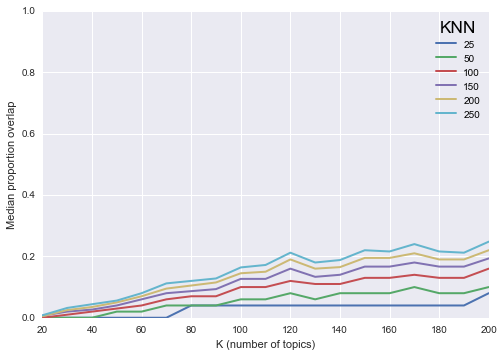

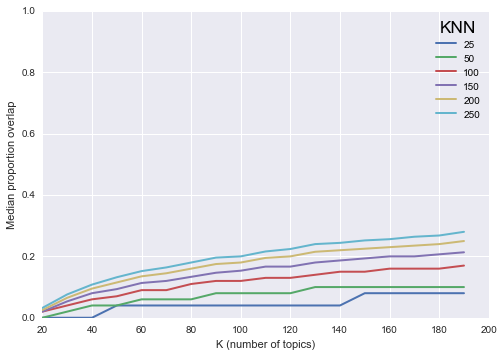

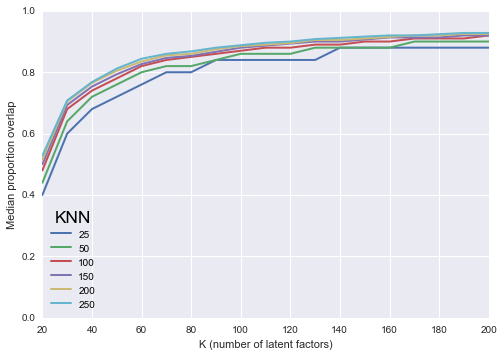

In [60]:
# ax = lda_summary.xs('split',level='source').reset_index().pivot(index='k',
#                         columns='topN',values='median').plot(ylim=(0,1),lw=2)
# l = ax.get_legend()
# for text in l.get_texts():
#     text.set_color("black")
# t = l.get_title()
# t.set_text("KNN")
# t.set_color("black")
# t.set_fontsize("x-large")
# ax.set_ylabel("Median proportion overlap")
# ax.set_xlabel("K (number of topics)")
# ax.set_title('"split" method')
# ax.set_xticks(np.arange(20,201,20))
# ax.grid(which='both')

for i,d in enumerate((lda_summary,lda_summary_artists,mf_summary)):
    ax=d.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1),lw=2)
    l = ax.get_legend()
    for text in l.get_texts():
        text.set_color("black")
    t = l.get_title()
    t.set_text("KNN")
    t.set_color("black")
    t.set_fontsize("x-large")
    ax.set_ylabel("Median proportion overlap")
    if i ==2:
        ax.set_xlabel("K (number of latent factors)")
    else:
        ax.set_xlabel("K (number of topics)")
#    ax.set_title('"prev" method')
    #ax.grid(which='both')
    ax.set_xlim(20,200)

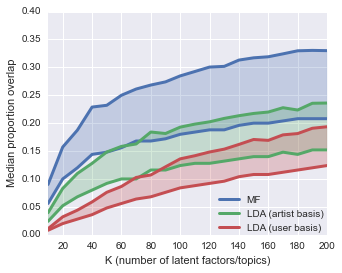

In [684]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

mf_poss = nmf_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
mf_poss.plot(ax=ax,lw=3,label='MF',color=colors[0],ls='-')
mf_cons = nmf_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
mf_cons.plot(ax=ax,lw=3,color=colors[0],ls='-')
ax.fill_between(np.arange(10,201,10),mf_cons,mf_poss,color=colors[0],alpha=0.25)

lda_a_cons = lda_summary_artists.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
lda_a_cons.plot(ax=ax,lw=3,label='LDA (artist basis)',c=colors[1],ls='-')
lda_a_poss = lda_summary_artists.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
lda_a_poss.plot(ax=ax,lw=3,c=colors[1],ls='-')
ax.fill_between(np.arange(10,201,10),lda_a_cons,lda_a_poss,color=colors[1],alpha=0.25)

lda_cons = lda_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
lda_cons.plot(ax=ax,lw=3,label='LDA (user basis)',ls='-',c=colors[2])
lda_poss = lda_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
lda_poss.plot(ax=ax,lw=3,ls='-',c=colors[2])
ax.fill_between(np.arange(10,201,10),lda_cons,lda_poss,color=colors[2],alpha=0.25)



ax.set_ylim(0,0.4)
handles,labels = ax.get_legend_handles_labels()
l = ax.legend([handles[0],handles[2],handles[4]],[labels[0],labels[2],labels[4]],loc=(0.6,-0.01))#'lower right')
#for text in l.get_texts():
#    text.set_color("black")
 
ax.set_xticks(np.arange(20,201,20))
#ax.grid()
ax.set_xlabel("K (number of latent factors/topics)")
ax.set_ylabel("Median proportion overlap")

# ax.annotate("LDA (user basis)",(80,0.035),color=colors[2],fontsize='x-large')
# ax.annotate("MF model",(41,0.32),color=colors[0],fontsize='x-large')
# ax.annotate("LDA (artist basis)",(35,0.2),color=colors[1],fontsize='x-large')

fig.savefig('/Users/jaredlorince/Desktop/fm_alignment.pdf',bbox_inches='tight')


In [29]:
artist_data = pd.read_table('../GenreModeling/data/artist_data',header=None,
                            names=['artist_id','artist_name','scrobbles','listeners'])

playcounts = pd.Series([int(line.strip()) for line in open('../GenreModeling/data/playcounts')])
playcounts.sort(ascending=False)
playcounts = playcounts.reset_index(drop=True)

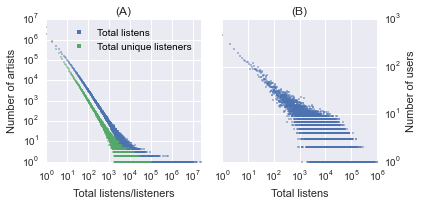

In [51]:
fig,axes = plt.subplots(1,2,figsize=(6,3))
ax = axes[0]
artist_data['scrobbles'].value_counts().sort_index().plot(marker='.',ax=ax,
                                                          ls='',loglog=True,label='Total listens',ms=3)
artist_data['listeners'].value_counts().sort_index().plot(marker='.',
                                                          ls='',loglog=True,ax=ax,label='Total unique listeners',ms=3)
ax.set_xlabel('Total listens/listeners')
ax.set_ylabel('Number of artists')
#ax.axvline(100,c='green',ls='--')
#ax.axvline(1000,c='blue',ls='--')
ax.set_title(r"(A)")
l = ax.legend(markerscale=3)
for text in l.get_texts():
    text.set_color("black")
#ax.grid()  

ax = axes[1]
playcounts.value_counts().sort_index().plot(marker='.',ls='',loglog=True,ax=ax,ms=3)
ax.set_xlabel('Total listens')
ax.set_title("(B)")
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_ylabel('Number of users')

plt.tight_layout()
fig.savefig('/Users/jaredlorince/Desktop/freq_dists.png',dpi=400,bbox_inches='tight')

In [311]:
files = glob.glob('../GenreModeling/manual_eval/results_old//*_log')
artist_ids = {}
with open('../GenreModeling/data/vocab_idx') as fin:
    for line in fin:
        line = line.strip().split()
        artist_ids[int(line[1])] = line[0]
df_list = []
for f in files:
    df = pd.read_table(f,header=None,names=['ts','artist_a','artist_b','artist_c','ab_dist','bc_dist','agree'])
    iden = f.split('/')[-1].split('_')[0]
    df['iden'] = iden
    df_list.append(df)
raw_eval_data = pd.concat(df_list).drop_duplicates().dropna()
#print eval_data['iden'].value_counts()
#print eval_data['agree'].value_counts()
raw_eval_data = raw_eval_data[raw_eval_data['agree']!=-1]
raw_eval_data['artist_name_a'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_a']),axis=1)
raw_eval_data['artist_name_b'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_b']),axis=1)
raw_eval_data['artist_name_c'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_c']),axis=1)
raw_eval_data['agree'] = raw_eval_data['agree'].apply(lambda x: 0.5 if x==2 else x)
def response_parse(row):
    if row['agree'] == 0.5:
        return '='
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['agree']==1.:
                response = 'c'
            elif row['agree'] == 0.:
                response = 'a'
        elif (row['ab_dist']<row['bc_dist']):
            if row['agree']==1.:
                response = 'a'
            elif row['agree'] == 0.:
                response = 'c'
    return response

def agree_parse(row):
    if row['response'] == '=':
        return 0.5
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['response']=='c':
                return 1
            elif row['response'] == 'a':
                return 0
        elif (row['ab_dist']<row['bc_dist']):
            if row['response']=='a':
                return 1
            elif row['response'] == 'c':
                return 0
            
raw_eval_data['response'] = raw_eval_data.apply(response_parse,axis=1)

from scipy.stats import entropy
from numpy.linalg import norm


def process(k,d,method='cosine',gamma=1.):
    processed = raw_eval_data.copy()
    artist_features = np.load("../GenreModeling/data/features/{}/features_{}.npy".format(d,k))
    if method=='jsd':
        def calc_dist(artist_a,artist_b):
            P = artist_features[artist_a]
            Q = artist_features[artist_b]
            _P = P / norm(P, ord=1)
            _Q = Q / norm(Q, ord=1)
            _M = 0.5 * (_P + _Q)
            return np.sqrt(0.5 * (entropy(_P, _M) + entropy(_Q, _M)))
    else:
        def calc_dist(artist_a,artist_b):
            return cosine(artist_features[artist_a],artist_features[artist_b])            
    processed['ab_dist'] = processed.apply(lambda row: calc_dist(row['artist_a'],row['artist_b']),axis=1)
    processed['bc_dist'] = processed.apply(lambda row: calc_dist(row['artist_b'],row['artist_c']),axis=1)
    #processed['dist_dif'] = np.clip(np.abs(processed['ab_dist']-processed['bc_dist']),0,1)
    processed['agree'] = processed.apply(agree_parse,axis=1)
    def luce(row):
        #ab = np.exp(max(0,1-row['ab_dist'])/gamma)
        #bc = np.exp(max(0,1-row['bc_dist'])/gamma)
        ab = max(0,1-row['ab_dist'])**gamma
        bc = max(0,1-row['bc_dist'])**gamma
        #ab = max(0.01,1- row['ab_dist'])
        #bc = max(0.01,1- row['bc_dist'])
        if ab==0. and bc==0.:
            return 0.5
        result = max([ab,bc]) / (ab+bc)
        return min(0.999,result)
                                          
    processed['luce'] = processed.apply(luce,axis=1)
    return processed

In [219]:
eval_data['agree'].value_counts()

1.0    1414
0.0     648
0.5     224
Name: agree, dtype: int64

In [ ]:
from scipy.stats import linregress
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Binomial
from sklearn.metrics import auc
from scipy.stats import spearmanr


#with open('/Users/jaredlorince/Documents/test','w') as fout:
for ax_idx,d in enumerate(('lda_users','nmf','lda_artists')): # 'mf','nmf','lda_artists'
    best = -np.inf
    best_k = None
    best_gamma = None
    for i,k in enumerate(np.arange(10,201,10)):
        #for gamma in (0.001,0.01,0.1,1.,10.,100.):
        for gamma in np.arange(0.01,100.01,0.01):
            eval_data = process(k,d,method=method,gamma=gamma)
            eval_data = eval_data[eval_data['agree']!=0.5]

            def calc_prob_old(row):
                if row['agree']==1:
                    return row['luce']
                else:
                    return 1 - row['luce']

            def calc_prob(row):
                prob_indif = 1-(2*(row['luce']-0.5))
                if row['agree']==1:
                    return row['luce'] / (1+prob_indif) 
                elif row['agree']==0:
                    return (1-row['luce']) / (1+prob_indif) 
                elif row['agree']==0.5:
                    return prob_indif / (1+prob_indif) 

            log_prob = np.log(eval_data.apply(calc_prob_old,axis=1)).sum()

#             probs = []
#             for row in eval_data.iterrows():
#                 row = row[1]
#                 if row['agree']==1:
#                     probs.append(row['luce'])
#                 elif row['agree']==0:
#                     probs.append(1 - row['luce'])
#                 elif row['agree']==0.5:
#                     probs+=[row['luce'],1 - row['luce']]
            #log_prob = np.log(np.array(probs)).sum()

            #fout.write('\t'.join(map(str,[d,k, log_prob, eval_data['agree'].sum() / float(len(eval_data)),gamma]))+'\n')
            #fout.flush()
            print d,k, log_prob, eval_data['agree'].sum() / float(len(eval_data)),gamma
            if log_prob>best:
                best = log_prob
                best_k = k
                best_gamma = gamma


    print d,best,best_k,best_gamma


/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


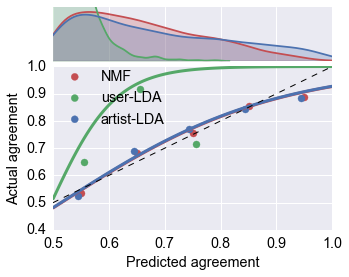

In [292]:
fig = plt.figure(figsize=(5,4)) 
gs = mpl.gridspec.GridSpec(2,1, height_ratios=[1,3],hspace=0.05) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax0.set_yticks([])
ax0.set_xticks(np.arange(0.5,1.,0.1))
ax0.set_xlim(0.5,1.)
ax0.set_ylim(0,4.)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

bins = bins = np.array([.55,.65,.75,.85,.95])

# for k in xrange(10,201,10):
#     eval_data = process(k,'nmf')
#     seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[2],line_kws={'lw':0.5,'ls':'-','alpha':0.25},scatter=False,ci=None)#, ci=None)
#     eval_data = process(k,'lda_artists')
#     seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[0],line_kws={'lw':0.5,'ls':'-','alpha':0.25},scatter=False,ci=None)#, ci=None)
#     eval_data = process(k,'lda_users')
#     seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[1],line_kws={'lw':0.5,'ls':'-','alpha':0.25},scatter=False,ci=None)#, ci=None)

# eval_data = process(60,'mf')
# seaborn.regplot(x='dist_dif',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[0],line_kws={'lw':3,'ls':'-'},x_bins=bins-.006,label='MF')#,ci=None)
# seaborn.kdeplot(eval_data['dist_dif'],ax=ax0,color=colors[0],shade=True,legend=None)

eval_data = process(130,'nmf',gamma=1.)
#eval_data = process(200,'nmf')
eval_data = eval_data[eval_data['agree']!=0.5]
seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=True,ax=ax1,color=colors[2],line_kws={'lw':3,'ls':'-'},x_bins=bins,label='NMF', ci=None)
seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[2],shade=True,legend=None)
log_prob_nmf = np.log(eval_data.apply(calc_prob,axis=1)).sum()

eval_data = process(170,'lda_users',gamma=0.1)
eval_data = eval_data[eval_data['agree']!=0.5]
seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=True,ax=ax1,color=colors[1],line_kws={'lw':3,'ls':'-'},x_bins=bins+0.006,label='user-LDA', ci=None)
seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[1],shade=True,legend=None)
log_prob_lda_u = np.log(eval_data.apply(calc_prob,axis=1)).sum()

eval_data = process(110,'lda_artists',gamma=1.)
#eval_data = process(190,'lda_artists')
eval_data = eval_data[eval_data['agree']!=0.5]
seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=True,ax=ax1,color=colors[0],line_kws={'lw':3,'ls':'-'},x_bins=bins-0.006,label='artist-LDA',ci=None)
seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[0],shade=True,legend=None)
log_prob_lda_a = np.log(eval_data.apply(calc_prob,axis=1)).sum()


# eval_data = process(70,'mf')
# eval_data = eval_data[eval_data['agree']!=0.5]
# seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[3],line_kws={'lw':3,'ls':'-'},x_bins=bins+0.003,label='MF',ci=None)
# seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[3],shade=True,legend=None)
# log_prob_mf = np.log(eval_data.apply(calc_prob,axis=1)).sum()





ax1.plot(np.arange(0,1.,0.001),np.arange(0,1.,0.001),ls='--',lw=1,c='k')



#ax1.set_xlabel("|dist(A,B) - dist(A,C)|")
ax1.set_xlabel("Predicted agreement")
ax1.set_ylabel("Actual agreement")
ax1.set_ylim(0.4,1.)
ax1.set_xlim(0.5,1.)
#ax1.axhline(0.5,ls='--',c='k',lw=1)
ax1.legend(loc=(0.005,0.6))
#ax1.legend(loc='upper left')
#plt.tight_layout()
fig.savefig('/Users/jaredlorince/Desktop/human_eval.pdf',bbox_inches='tight')


In [160]:
print log_prob_nmf,log_prob_lda_a,log_prob_lda_u,log_prob_mf
print np.exp(log_prob_lda_a-log_prob_lda_u)
print np.exp(log_prob_lda_a-log_prob_nmf)

-1250.26188676 -1200.8379917 -1311.34671825 -1288.55314123
9.84759415498e+47
2.9142372217e+21


In [270]:
for y,x in [(0.1,0.2),(0.5,0.6),(0.2,.9)]:
    #for gamma in np.arange(0.01,1.1,0.01):
    for gamma in (0.001,0.01,0.1,1.,10.,100.):
        print x**gamma / (x**gamma+y**gamma)
        #print np.exp(x/gamma)/ ((np.exp(x/gamma))+np.exp(y/gamma))
    print x/(x+y)
    print '---'

0.500173286788
0.501732861013
0.517321744832
0.666666666667
0.999024390244
1.0
0.666666666667
---
0.500045580389
0.500455803766
0.504557912662
0.545454545455
0.860951522516
0.999999987925
0.545454545455
---
0.500376019278
0.503760122606
0.537531207474
0.818181818182
0.99999970632
1.0
0.818181818182
---


/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


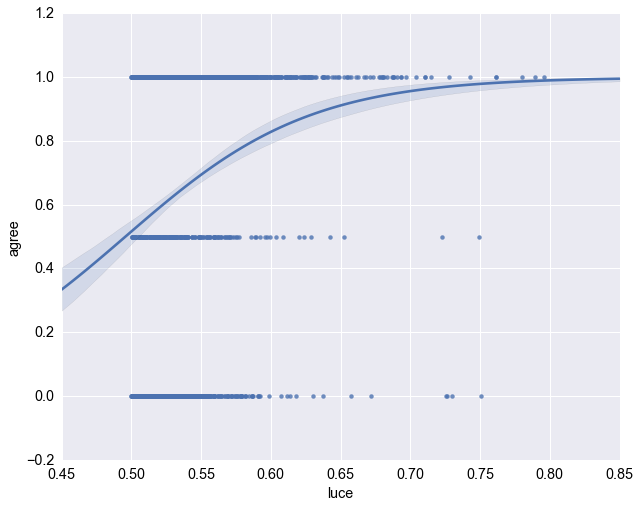

In [308]:
eval_data = process(170,'lda_users',gamma=0.1)
seaborn.regplot(data=eval_data,x='luce',y='agree',logistic=True)#,x_bins=bins)

In [301]:
(eval_data['luce'][eval_data['luce']<.999]).describe()

count    74.000000
mean      0.871850
std       0.153149
min       0.500000
25%       0.760558
50%       0.950409
75%       0.993218
max       0.998987
Name: luce, dtype: float64

In [174]:
np.exp(np.log(3))

3.0000000000000004

In [703]:
x = process(100,'lda_artists',method='cosine')
y = process(100,'lda_artists',method='jsd')

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:61: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [708]:
from scipy.stats import spearmanr,pearsonr
print spearmanr(x['ab_dist'],y['ab_dist'])
print pearsonr(x['ab_dist'],y['ab_dist'])

(0.95960375251612284, 0.0)
(0.95133015372541851, 0.0)


In [276]:
d_user = np.load('/Users/jaredlorince/Documents/dists_170.npy')[:,0]
d_artist = np.load('/Users/jaredlorince/Documents/dists_110.npy')[:,0]

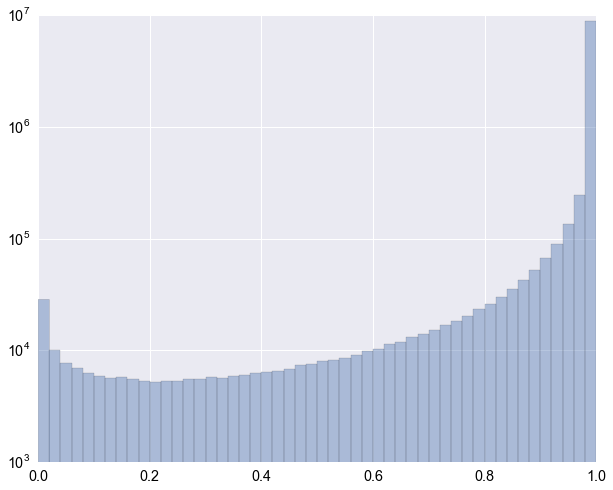

In [288]:
ax=seaborn.distplot(,kde=False)
ax.set_yscale('log')

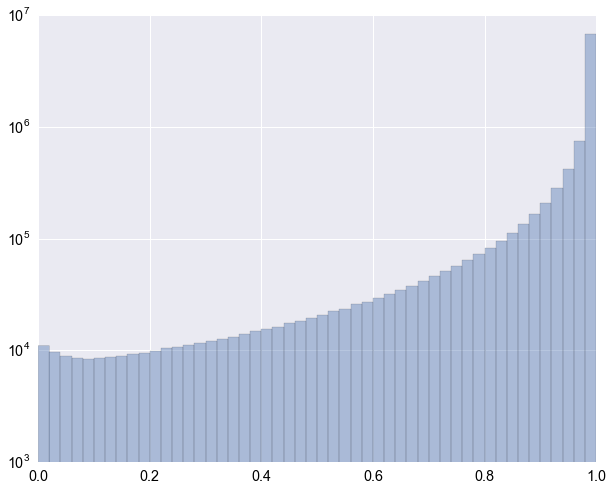

In [290]:
ax = seaborn.distplot(d_artist,kde=False)
ax.set_yscale('log')

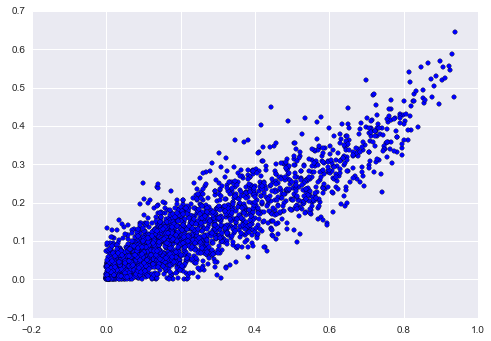

In [726]:
plt.scatter(x=x['dist_dif'],y=y['dist_dif'])

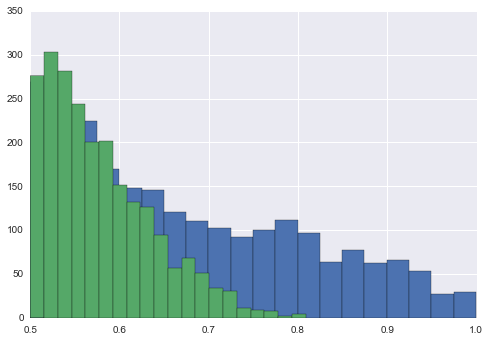

In [729]:
x['luce'].hist(bins=20)
y['luce'].hist(bins=20)

In [34]:
eval_data  = process(100,'nmf')
test = eval_data[(eval_data['dist_dif']<0.15)]
test.shape

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(1167, 14)

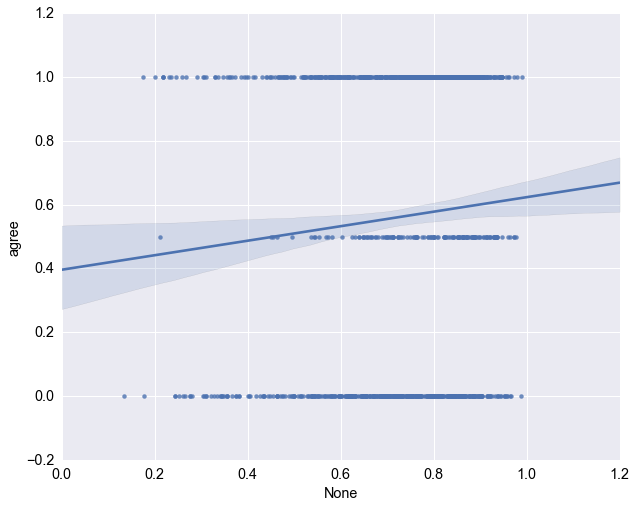

In [35]:
#seaborn.regplot(data=test,x='luce_exp',y='agree')
#test.sort('luce',ascending=False)
seaborn.regplot(data=test,x=(test['ab_dist']+test['bc_dist'])/2.,y='agree')

In [848]:
def calc_prob(row):
    if row['agree']==1:
        return row['luce']
    else:
        return 1 - row['luce']
np.log(eval_data.apply(calc_prob,axis=1)).sum()


-1472.2385595902415

In [25]:
from numpy import exp,array,log,exp
x = np.array([0.5,0.5,0.4])
y = np.array([0.5,0.3,0.2])


In [26]:
x.prod()/y.prod()

3.3333333333333335

In [31]:
exp(np.log(x).sum()-np.log(y).sum())

3.3333333333333344

In [874]:
lm = GLM(x,y).fit()

In [875]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                    3
Model:                            GLM   Df Residuals:                        2
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                 0.0268421052632
Method:                          IRLS   Log-Likelihood:                 1.7781
Date:                Sun, 17 Apr 2016   Deviance:                     0.053684
Time:                        15:08:24   Pearson chi2:                   0.0537
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.2632      0.266      4.753      0.000         0.742     1.784
==============================================================================
"""